In [7]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [8]:
# Load Data Viz Pkgs
import seaborn as sns

In [11]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [12]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [18]:
from nltk.corpus import stopwords
import re

In [13]:
df = pd.read_excel('input_data.xlsx')

In [14]:
df

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [15]:
df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_64       1
GRP_67       1
GRP_35       1
GRP_70       1
GRP_61       1
Name: Assignment group, Length: 74, dtype: int64

In [17]:
desc_col='Short description'
#Data cleaning 

#lower case, only alphabets, remove spaces, remove stopwords
df['text_clean'] = df[desc_col].apply(lambda x: str(x).lower())
df['text_clean'] = df['text_clean'].apply(lambda x: re.sub('[^a-zA-z0-9_\s]','',str(x)))
stopwords = set(stopwords.words('english'))
df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
df['text_clean'] = df['text_clean'].apply(lambda x: str(x).strip())

                                                                    

In [19]:
df

,Short description,Description,Caller,Assignment group,text_clean
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log vpn
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error
...,...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,emails coming zz mail
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2 windows password reset tifpdchb pedxruyf
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,machine est funcionando


In [20]:
df['Length']=df['text_clean'].apply(lambda x: len(x))

In [21]:
df.sort_values(by='Length') #other languages are present in data

,Short description,Description,Caller,Assignment group,text_clean,Length
7316,æ‹¼å†™å’Œè¯­æ³•é”™è¯¯,"ç¼–è¾‘pptæ—¶ï¼Œæ€»æ˜¯å¼¹å‡º""æ— æ³•æ£€æŸ¥æ‹¼å†™...",jtplaoui uvsihfpn,GRP_48,,0
7126,ç”µè„‘å¡ä¸”è¿žä¸ä¸Šå†…ç½‘,\n\nreceived from: tuqrvowp.fxmzkvqo@gmail.com...,tuqrvowp fxmzkvqo,GRP_30,,0
1954,ç¬”è®°æœ¬é‡æ–°è£…ä¸‹ç³»ç»Ÿ,æŠŠæˆ‘çš„ç¬”è®°æœ¬é‡æ–°è£…ä¸‹ç³»ç»Ÿ,xjvubmlq vyamhjip,GRP_30,,0
3738,ç”µè¯æ•…éšœ,é“¸æ£’è½¦é—´ç”µè¯æ•…éšœï¼Œ39523850,sbkhjigv pbvlfcse,GRP_48,,0
2975,???????????????????,\r\n\r\nreceived from: yzbjhmpw.vzrulkog@gmail...,yzbjhmpw vzrulkog,GRP_0,,0
...,...,...,...,...,...,...
2288,russia: interface: vlan1 Â· russia engineering...,russia: interface: vlan1 Â· russia engineerin...,rkupnshb gsmzfojw,GRP_8,russia interface vlan1 russia engineering_tool...,121
7019,need uasername and password of .telephony_sof...,emails of australia team not polling into tele...,zupifghd vdqxepun,GRP_7,need uasername password telephony_softwareserv...,121
3201,erp printing issue : connection to system prod...,erp printing issue : connection to system prod...,acmglkti cwgxrabu,GRP_0,erp printing issue connection system productio...,123
8084,updated win10 uacyltoe hxgaycze machine eaglt0...,"hello antivirus team,\r\n\r\nmy win10 uacyltoe...",nwfoucba dzbujamc,GRP_50,updated win10 uacyltoe hxgaycze machine eaglt0...,130


In [22]:
df[df["Length"]==0]["Length"].value_counts()

0    47
Name: Length, dtype: int64

In [23]:

#Remove other languages alphabets
df=df[df["Length"]!=0]

In [24]:
df

,Short description,Description,Caller,Assignment group,text_clean,Length
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue,11
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook,7
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log vpn,12
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable access hr_tool page,26
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,11
...,...,...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,emails coming zz mail,21
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue,24
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2 windows password reset tifpdchb pedxruyf,45
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,machine est funcionando,23


In [26]:
df['Assignment group'].value_counts()

GRP_0     3974
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_70       1
GRP_73       1
GRP_35       1
GRP_64       1
GRP_67       1
Name: Assignment group, Length: 74, dtype: int64

In [34]:
Assignment_group=pd.DataFrame(df["Assignment group"].value_counts()).reset_index().sort_values(by='Assignment group',ascending=False)
Assignment_group.to_csv('file.csv')

In [37]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [39]:
Assignment_group=pd.DataFrame(df["Assignment group"].value_counts()).reset_index().sort_values(by='Assignment group',ascending=False)
Assignment_group.columns=['Assignment group','Count']

Assignment_group['Percent']=Assignment_group.Count/Assignment_group.Count.sum()*100
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(Assignment_group)


   Assignment group  Count  Percent
0             GRP_0   3974   47.013
1             GRP_8    661    7.820
2            GRP_24    289    3.419
3            GRP_12    257    3.040
4             GRP_9    252    2.981
5             GRP_2    241    2.851
6            GRP_19    215    2.543
7             GRP_3    200    2.366
8             GRP_6    184    2.177
9            GRP_13    145    1.715
10           GRP_10    140    1.656
11            GRP_5    129    1.526
12           GRP_14    118    1.396
13           GRP_25    116    1.372
14           GRP_33    107    1.266
15            GRP_4    100    1.183
16           GRP_29     97    1.148
17           GRP_18     88    1.041
18           GRP_16     85    1.006
19           GRP_17     81    0.958
20            GRP_7     68    0.804
21           GRP_34     62    0.733
22           GRP_31     60    0.710
23           GRP_26     56    0.662
24           GRP_40     45    0.532
25           GRP_28     44    0.521
26           GRP_41     40  

In [40]:
# 19 groups are taking 88% of tickets SO clubbing the other into a single  

In [41]:
shorted_group = Assignment_group[Assignment_group['Percent']>1]

In [45]:
groups = np.array(shorted_group['Assignment group'])

In [46]:
groups

array(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_4', 'GRP_29', 'GRP_18', 'GRP_16'], dtype=object)

In [56]:
df['updated_group'] = np.where(df['Assignment group'].isin(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_4', 'GRP_29', 'GRP_18', 'GRP_16']),df['Assignment group'], 'GRP_X')

In [57]:
df

,Short description,Description,Caller,Assignment group,text_clean,Length,updated_group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue,11,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook,7,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log vpn,12,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable access hr_tool page,26,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,11,GRP_0
...,...,...,...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,emails coming zz mail,21,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue,24,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2 windows password reset tifpdchb pedxruyf,45,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,machine est funcionando,23,GRP_X


In [58]:
df['updated_group'].value_counts()

GRP_0     3974
GRP_X     1055
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
Name: updated_group, dtype: int64

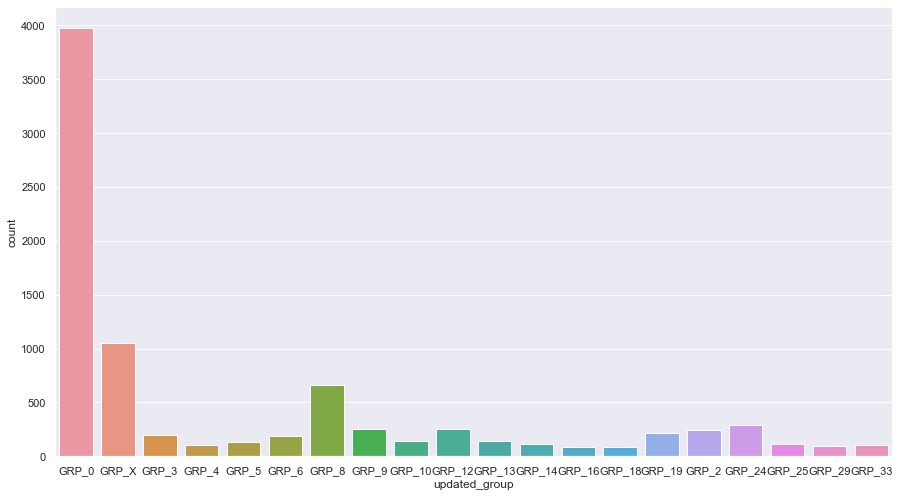

In [61]:
# Plot
sns.set(rc={'figure.figsize':(15,8.27)})
sns.countplot(x='updated_group',data=df)

In [62]:
df

,Short description,Description,Caller,Assignment group,text_clean,Length,updated_group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue,11,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook,7,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log vpn,12,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable access hr_tool page,26,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,11,GRP_0
...,...,...,...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,emails coming zz mail,21,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue,24,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2 windows password reset tifpdchb pedxruyf,45,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,machine est funcionando,23,GRP_X


In [63]:
Xfeatures = df['text_clean']
ylabels = df['updated_group']

In [64]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [65]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [89]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [90]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\Users\JAtin bhatia\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [91]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [92]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6865141955835962

In [96]:
# Make A Prediction
ex1 = "emails not coming in from zz mail"

In [97]:
pipe_lr.predict([ex1])


array(['GRP_X'], dtype=object)

In [98]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.23484646, 0.0137419 , 0.02571787, 0.01319173, 0.00961136,
        0.02506817, 0.01775078, 0.05682188, 0.01835689, 0.01119827,
        0.01999079, 0.20479991, 0.01611805, 0.02240698, 0.00895821,
        0.00372647, 0.00670323, 0.01246352, 0.01153933, 0.26698821]])

In [73]:
# To Know the classes
pipe_lr.classes_

array(['GRP_0', 'GRP_10', 'GRP_12', 'GRP_13', 'GRP_14', 'GRP_16',
       'GRP_18', 'GRP_19', 'GRP_2', 'GRP_24', 'GRP_25', 'GRP_29', 'GRP_3',
       'GRP_33', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_8', 'GRP_9', 'GRP_X'],
      dtype=object)

In [74]:
# Save Model & Pipeline
import joblib
pipeline_file = open("Capstone_22_07.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

# NB

In [75]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('NB',MultinomialNB())])

In [76]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('NB', MultinomialNB())])

In [77]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('NB', MultinomialNB())])

In [78]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6474763406940063

In [79]:
# Make A Prediction
ex1 = "unable access hr_tool page"

In [71]:
pipe_lr.predict([ex1])


array(['GRP_0'], dtype=object)

In [72]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[9.06536812e-01, 4.67641613e-04, 9.86773804e-03, 8.41701036e-04,
        7.07529046e-04, 5.58127668e-03, 4.08998712e-04, 3.34253116e-03,
        4.76285869e-02, 8.09090250e-04, 3.85371739e-03, 1.44346721e-03,
        1.63068278e-03, 4.81828069e-04, 1.53316723e-03, 1.64723313e-04,
        6.51147337e-04, 2.54426540e-04, 2.09402898e-04, 1.35855314e-02]])

In [73]:
# To Know the classes
pipe_lr.classes_

array(['GRP_0', 'GRP_10', 'GRP_12', 'GRP_13', 'GRP_14', 'GRP_16',
       'GRP_18', 'GRP_19', 'GRP_2', 'GRP_24', 'GRP_25', 'GRP_29', 'GRP_3',
       'GRP_33', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_8', 'GRP_9', 'GRP_X'],
      dtype=object)

# Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
# LogisticRegression Pipeline
pipe_dtc = Pipeline(steps=[('cv',CountVectorizer()),('DTC',DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5))])

In [82]:
# Train and Fit Data
pipe_dtc.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('DTC',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=5,
                                        random_state=100))])

In [83]:
pipe_dtc

Pipeline(steps=[('cv', CountVectorizer()),
                ('DTC',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=5,
                                        random_state=100))])

In [84]:
# Check Accuracy
pipe_dtc.score(x_test,y_test)

0.5619085173501577

In [85]:
# Make A Prediction
ex1 = "unable access hr_tool page"

In [86]:
pipe_dtc.predict([ex1])


array(['GRP_0'], dtype=object)

In [87]:
# Prediction Prob
pipe_dtc.predict_proba([ex1])

array([[0.54798885, 0.00975707, 0.0342493 , 0.02070888, 0.01612903,
        0.01314217, 0.0125448 , 0.02807646, 0.03345281, 0.02489048,
        0.01772202, 0.01493429, 0.02887296, 0.01433692, 0.01095181,
        0.00199124, 0.00736758, 0.01135006, 0.00876145, 0.1427718 ]])

In [88]:
# To Know the classes
pipe_dtc.classes_

array(['GRP_0', 'GRP_10', 'GRP_12', 'GRP_13', 'GRP_14', 'GRP_16',
       'GRP_18', 'GRP_19', 'GRP_2', 'GRP_24', 'GRP_25', 'GRP_29', 'GRP_3',
       'GRP_33', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_8', 'GRP_9', 'GRP_X'],
      dtype=object)

# using all labels

In [99]:
Xfeatures = df['text_clean']
ylabels = df['Assignment group']

In [100]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [101]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [108]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(max_iter=1000))])

In [109]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(max_iter=1000))])

In [110]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(max_iter=1000))])

In [111]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6782334384858044

In [112]:
# Make A Prediction
ex1 = "emails not coming in from zz mail"

In [113]:
pipe_lr.predict([ex1])


array(['GRP_0'], dtype=object)

In [114]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.21772602, 0.00512956, 0.01458294, 0.00543138, 0.02713168,
        0.01316889, 0.01017577, 0.00994516, 0.02634303, 0.00059198,
        0.01816568, 0.05828189, 0.01826429, 0.00926604, 0.00445629,
        0.00270709, 0.00198508, 0.0119062 , 0.02088667, 0.0700856 ,
        0.01013492, 0.01015681, 0.20704652, 0.01669286, 0.00860314,
        0.01309871, 0.00124581, 0.02297645, 0.01323532, 0.00281056,
        0.00295049, 0.00088947, 0.00335101, 0.00947358, 0.01277705,
        0.00719241, 0.00716053, 0.00141012, 0.00290587, 0.00612555,
        0.00211061, 0.00396882, 0.00113635, 0.00166094, 0.0040843 ,
        0.00370154, 0.00127577, 0.00260318, 0.00222973, 0.00092255,
        0.00181496, 0.00122423, 0.00063282, 0.0005874 , 0.00119069,
        0.00721285, 0.00226088, 0.00047641, 0.00761771, 0.00048726,
        0.00048132, 0.00252598, 0.00110201, 0.00117075, 0.0140057 ,
        0.00054099, 0.00103168, 0.01337623, 0.0120979 ]])

In [117]:
# To Know the classes
pipe_lr.classes_

array(['GRP_0', 'GRP_1', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_3', 'GRP_30',
       'GRP_31', 'GRP_32', 'GRP_33', 'GRP_34', 'GRP_36', 'GRP_37',
       'GRP_38', 'GRP_39', 'GRP_4', 'GRP_40', 'GRP_41', 'GRP_42',
       'GRP_43', 'GRP_44', 'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48',
       'GRP_49', 'GRP_5', 'GRP_50', 'GRP_51', 'GRP_52', 'GRP_53',
       'GRP_54', 'GRP_55', 'GRP_56', 'GRP_57', 'GRP_58', 'GRP_59',
       'GRP_6', 'GRP_60', 'GRP_61', 'GRP_62', 'GRP_63', 'GRP_64',
       'GRP_65', 'GRP_66', 'GRP_68', 'GRP_7', 'GRP_71', 'GRP_72', 'GRP_8',
       'GRP_9'], dtype=object)

# Adding both short & Long description

In [134]:
df['concat'] = df['Short description'] +''+ df['Description']

In [135]:
df2 = df.copy()

In [142]:
from nltk.corpus import stopwords

In [143]:
desc_col='concat'
#Data cleaning 

#lower case, only alphabets, remove spaces, remove stopwords
df2['text_clean'] = df2[desc_col].apply(lambda x: str(x).lower())
df2['text_clean'] = df2['text_clean'].apply(lambda x: re.sub('[^a-zA-z0-9_\s]','',str(x)))
stopwords = set(stopwords.words('english'))
df2['text_clean'] = df2['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
df2['text_clean'] = df2['text_clean'].apply(lambda x: str(x).strip())

In [144]:
Xfeatures = df['text_clean']
ylabels = df['Assignment group']

In [145]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [146]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [156]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(max_iter = 1000))])

In [157]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(max_iter=1000))])

In [158]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(max_iter=1000))])

In [159]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.6782334384858044

In [160]:
# Make A Prediction
ex1 = "emails not coming in from zz mail"

In [161]:
pipe_lr.predict([ex1])


array(['GRP_0'], dtype=object)

In [162]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.21772602, 0.00512956, 0.01458294, 0.00543138, 0.02713168,
        0.01316889, 0.01017577, 0.00994516, 0.02634303, 0.00059198,
        0.01816568, 0.05828189, 0.01826429, 0.00926604, 0.00445629,
        0.00270709, 0.00198508, 0.0119062 , 0.02088667, 0.0700856 ,
        0.01013492, 0.01015681, 0.20704652, 0.01669286, 0.00860314,
        0.01309871, 0.00124581, 0.02297645, 0.01323532, 0.00281056,
        0.00295049, 0.00088947, 0.00335101, 0.00947358, 0.01277705,
        0.00719241, 0.00716053, 0.00141012, 0.00290587, 0.00612555,
        0.00211061, 0.00396882, 0.00113635, 0.00166094, 0.0040843 ,
        0.00370154, 0.00127577, 0.00260318, 0.00222973, 0.00092255,
        0.00181496, 0.00122423, 0.00063282, 0.0005874 , 0.00119069,
        0.00721285, 0.00226088, 0.00047641, 0.00761771, 0.00048726,
        0.00048132, 0.00252598, 0.00110201, 0.00117075, 0.0140057 ,
        0.00054099, 0.00103168, 0.01337623, 0.0120979 ]])

In [154]:
# To Know the classes
pipe_lr.classes_

array(['GRP_0', 'GRP_1', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_3', 'GRP_30',
       'GRP_31', 'GRP_32', 'GRP_33', 'GRP_34', 'GRP_36', 'GRP_37',
       'GRP_38', 'GRP_39', 'GRP_4', 'GRP_40', 'GRP_41', 'GRP_42',
       'GRP_43', 'GRP_44', 'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48',
       'GRP_49', 'GRP_5', 'GRP_50', 'GRP_51', 'GRP_52', 'GRP_53',
       'GRP_54', 'GRP_55', 'GRP_56', 'GRP_57', 'GRP_58', 'GRP_59',
       'GRP_6', 'GRP_60', 'GRP_61', 'GRP_62', 'GRP_63', 'GRP_64',
       'GRP_65', 'GRP_66', 'GRP_68', 'GRP_7', 'GRP_71', 'GRP_72', 'GRP_8',
       'GRP_9'], dtype=object)

In [155]:
df2

,Short description,Description,Caller,Assignment group,text_clean,Length,updated_group,concat
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issueverified user detailsemployee manag...,11,GRP_0,login issue-verified user details.(employee# &...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook received hmjdrvpbkomuaywngmailcom hell...,7,GRP_0,outlook\r\n\r\nreceived from: hmjdrvpb.komuayw...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log vpn received eylqgodmybqkwiamgmailcom...,12,GRP_0,cant log in to vpn\r\n\r\nreceived from: eylqg...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable access hr_tool pageunable access hr_too...,26,GRP_0,unable to access hr_tool pageunable to access ...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,11,GRP_0,skype error skype error
...,...,...,...,...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,emails coming zz mail received avglmrtsvhqmtiu...,21,GRP_29,emails not coming in from zz mail\r\n\r\nrecei...
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issuetelephony_software issue,24,GRP_0,telephony_software issuetelephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,vip2 windows password reset tifpdchb pedxruyfv...,45,GRP_0,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,machine est funcionandoi unable access machine...,23,GRP_X,machine nÃ£o estÃ¡ funcionandoi am unable to a...
